# Logistic Regression
# Aditya Bagad

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns

### About dataset
We’ll use a telecommunications data for predicting customer churn. This is a historical customer data where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it’s less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Reading the dataset

In [2]:
dataFrame = pd.read_csv('ChurnData.csv')

In [3]:
dataFrame.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
dataFrame.shape

(200, 28)

In [5]:
dataFrame.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [6]:
dataFrame.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

### Data Pre-processing and Selection

In [7]:
dataFrame['churn'] = dataFrame['churn'].astype('int')

In [8]:
selected_data = dataFrame[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]

In [9]:
selected_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


### Splitting into features and labels

In [10]:
# Features
X = selected_data.iloc[:, :-1]

In [11]:
# Labels
y = selected_data.iloc[:, -1]

### Normalization of the feature set

In [12]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [13]:
X[0: 5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

### Spliting into Training and Testing set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
X_train.shape, X_test.shape

((180, 9), (20, 9))

In [16]:
y_train.shape, y_test.shape

((180,), (20,))

### Modeling

- Regularization is a technique used to solve the overfitting problem in machine learning models. 
- __C__  parameter indicates __inverse of regularization strength__ which must be a positive float.
- Smaller values specify stronger regularization.

In [17]:
from sklearn.linear_model import LogisticRegression

logistReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

### Predicting

In [18]:
y_pred = logistReg.predict(X_test)

- __predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [19]:
y_pred_probablities = logistReg.predict_proba(X_test)

In [20]:
y_pred_probablities[0:5]

array([[0.47113253, 0.52886747],
       [0.36093078, 0.63906922],
       [0.58881541, 0.41118459],
       [0.60172605, 0.39827395],
       [0.52384022, 0.47615978]])

### Model Evaluation

### 1. Accuracy Score

In [21]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("DecisionTree's Accuracy: ", accuracy)

DecisionTree's Accuracy:  0.75


### 2. Jaccard Index

In [22]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test, y_pred)

0.75

### 3. Confusion Matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

- __F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.62      0.71      0.67         7

   micro avg       0.75      0.75      0.75        20
   macro avg       0.73      0.74      0.73        20
weighted avg       0.76      0.75      0.75        20



In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  3]
 [ 2  5]]


### Visualize the Confusion Matrix

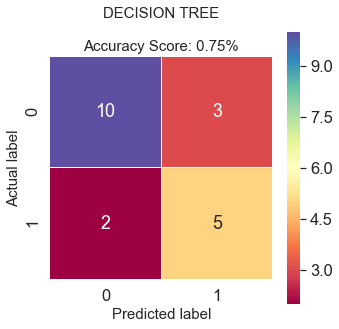

In [26]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square = True, cmap = 'Spectral')

plt.ylabel('Actual label', size=15)
plt.xlabel('Predicted label', size=15)

algo_title='DECISION TREE'
all_sample_title = algo_title + '\n\n' + 'Accuracy Score: {0}%'.format(accuracy)
plt.title(all_sample_title, size = 15)

plt.show()

### 4. Log Loss

- In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

In [27]:
from sklearn.metrics import log_loss

log_loss(y_test, y_pred)

8.634814038342201

## Modeling with different parameters

In [28]:
logReg_2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)

### Predicting

In [29]:
y_pred_2 = logReg_2.predict(X_test)

### Predicting Probablities

In [30]:
y_pred_prob_2 = logReg_2.predict_proba(X_test)

### Log Loss

In [31]:
log_loss(y_test, y_pred_2)

12.08857173821874